**Zomato Restaurant Data Analysis Project**

"""IN this Project , we analyze a dataset from Zomato containing restaurant listings from various Indian cities We'll explore pattern in ratings , cost , cuisines , and how features like online ordering or table booking impact customer satisfaction"""

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Settings 
sns.set(style='whitegrid')
%matplotlib inline 


In [3]:
#Load Dataset 
df = pd.read_csv("enhanced_zomato_dataset_clean.csv")
df.head(15)

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,...,Is_Bestseller,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NONE,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
5,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Pizza [8 inches],BESTSELLER,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
6,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Zinger Tortilla Wrap,CHEF'S SPECIAL,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
7,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Popcorn [20 Pieces],BESTSELLER,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
8,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Sandwich,NONE,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
9,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Bread Samoli Shawarma,NONE,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0


In [4]:
#Data Cleaning 
#"Chech shape and missing values"
#df.shape 
#df.isnull().sum()
#Clean column names 
#df.columns = df.columms.str.strip().str.lower().str.replace('' , '--')
#Drop duplicates if any
#df.drop_duplicates(inplace=True)
#convert cost and ratings to numeric if needed 
#df['cost_for_two'] = pd.to_numeric (df['cost_for_two'],errors='coerce')
#df['ratings'] = pd.to_numeric(df['rating'],errors = 'coerce')

"""Top Cities by number of restaurants"""

C:\Users\anita\AppData\Local\Temp\ipykernel_11588\3178610129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values,y=top_cities.index , palette = 'viridis')


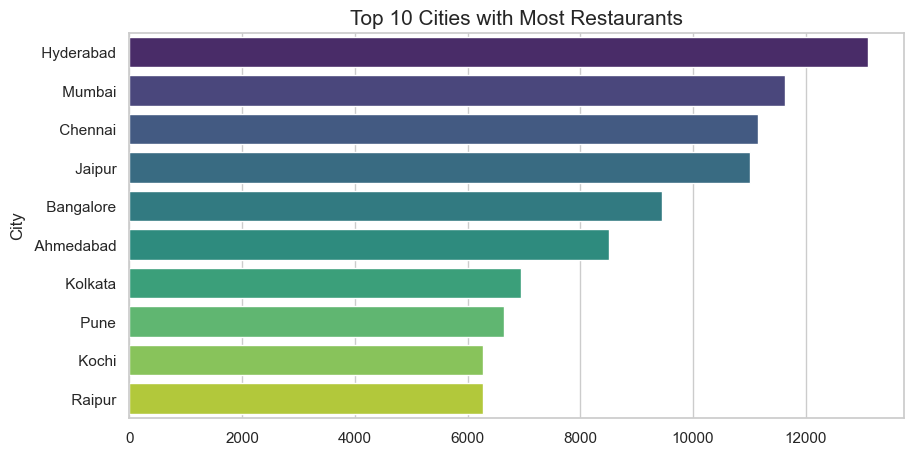

In [14]:
top_cities = df['City'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values,y=top_cities.index , palette = 'viridis')
plt.title("Top 10 Cities with Most Restaurants" , fontsize = 15)


plt.show()

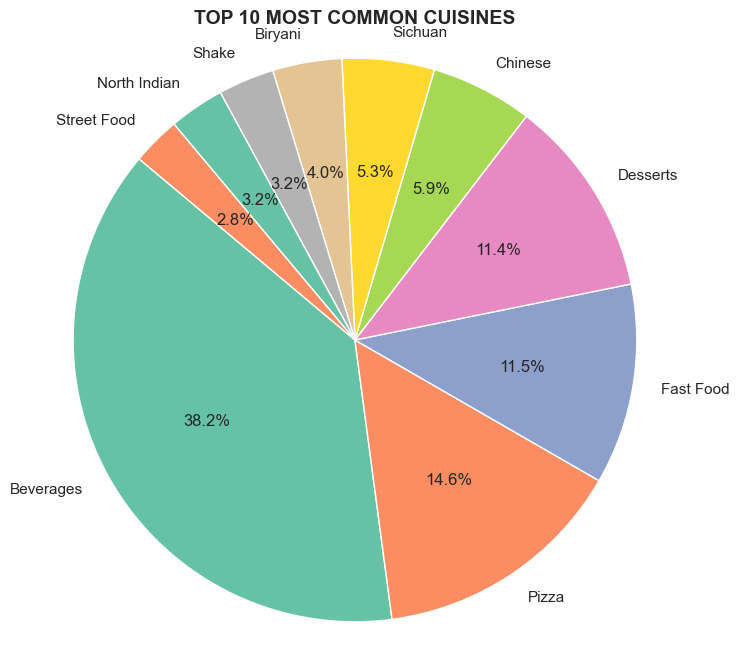

In [41]:
#Most Common Cuisines 
top_cuisines = df['Cuisine'].value_counts().head(10)
#plot as pie chart
plt.figure(figsize=(8,8))
plt.pie(top_cuisines.values , labels = top_cuisines.index , autopct = '%1.1f%%' , startangle = 140 , colors = sns.color_palette('Set2'))
plt.title("TOP 10 MOST COMMON CUISINES", fontsize = 14 , fontweight = 'bold')
plt.axis('equal')
plt.show()

#A pie chart showing the top 10 most frequent cuisines like: beverage , pizza , fast ffod , desserts , chinese.
#Each slice represents the percentage share of that cuisines in the dataset.
#GOAL : To find which cuisines appear most frequently across the dataset - meaning which are most commonly offered by restaurants.

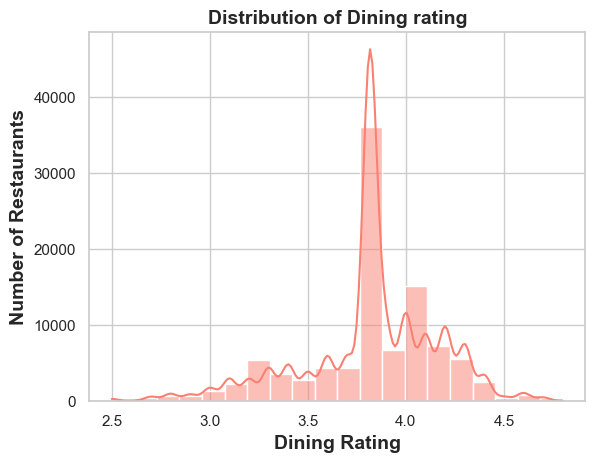

In [25]:
#1) Distribution of Dining Rating 
sns.histplot(df["Dining_Rating"] , bins = 20 , kde = True , color = 'salmon')
plt.title("Distribution of Dining rating" , fontweight = 'bold' , fontsize = 14)
plt.xlabel("Dining Rating" , fontweight = 'bold' , fontsize = 14)
plt.ylabel("Number of Restaurants" , fontweight = 'bold' , fontsize = 14)

plt.show()

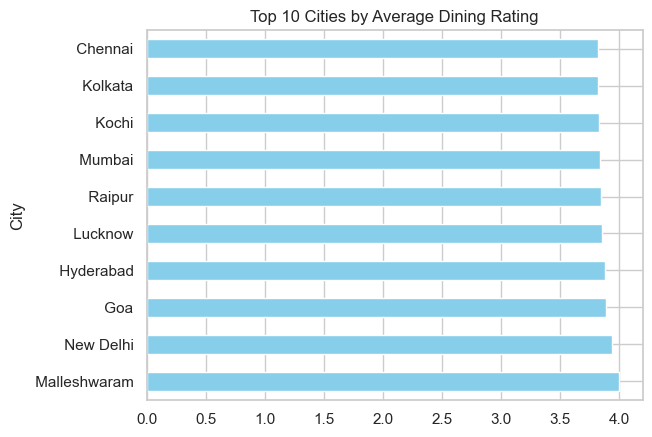

In [27]:
#2) Top Cities by Average Dining Rating:
top_dining_cities = df.groupby("City")['Dining_Rating'].mean().sort_values(ascending = False).head(10)
top_dining_cities.plot(kind = 'barh' , color = 'skyblue')
plt.title("Top 10 Cities by Average Dining Rating")
plt.show()

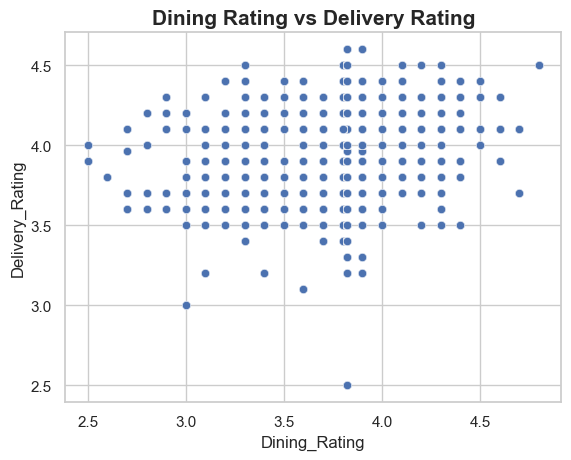

In [30]:
#3) Compare Dining vs Delivery Rating 
sns.scatterplot(data = df , x = 'Dining_Rating' , y = 'Delivery_Rating' , alpha = 0.7)
plt.title("Dining Rating vs Delivery Rating" , fontsize = 15 , fontweight = 'bold')
plt.show()

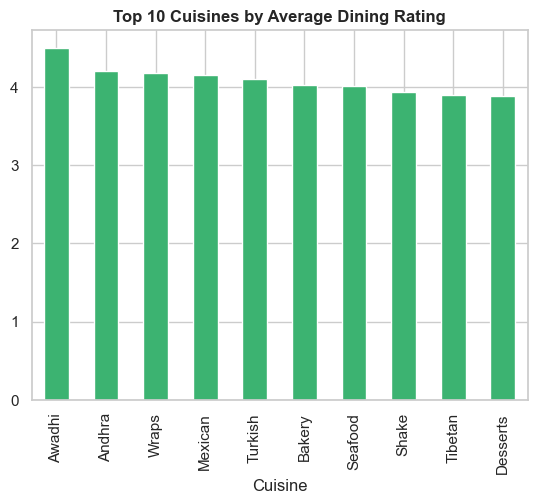

In [34]:
#4.Dining Rating by Cuisine 
top_cuisine_dining = df.groupby('Cuisine')['Dining_Rating'].mean().sort_values(ascending = False).head(10)
top_cuisine_dining.plot(kind='bar' , color = 'mediumseagreen')
plt.title("Top 10 Cuisines by Average Dining Rating" , fontweight = 'bold' )
plt.show()


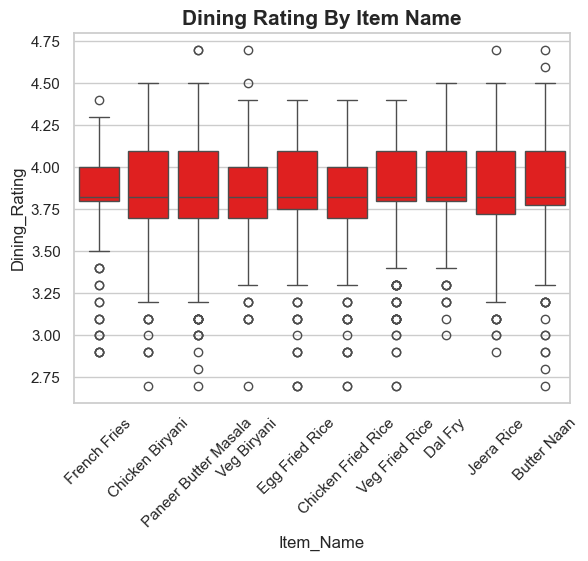

In [39]:
#Dining Rating By item Name(Box Plot)
top_items = df['Item_Name'].value_counts().head(10).index
filtered = df[df['Item_Name'].isin(top_items)]
sns.boxplot(data = filtered , x = 'Item_Name' , y = 'Dining_Rating' , color= 'red')
plt.xticks(rotation = 45)
plt.title("Dining Rating By Item Name" , fontsize = 15 , fontweight = 'bold')
plt.show()

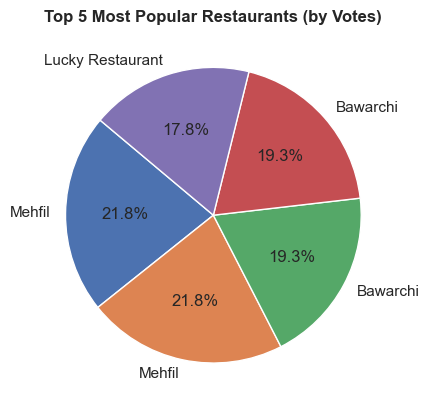

In [16]:
#Popular Restaurants 
popular = df[df['Votes'] > 50].sort_values(by='Votes' , ascending= False).head(10)
popular[['Restaurant_Name' , 'City' , 'Votes' , 'Average_Rating' , 'Cuisine']]
#Add Rating to it 
#Votes > 100
#Rating >4.0
popular_high_rated = df[(df['Votes'] > 100)&(df['Average_Rating'] >= 4.0)]
popular_high_rated = popular_high_rated.sort_values(by='Votes' , ascending = False)
popular_high_rated[['Restaurant_Name' , 'City' , 'Votes' , 'Average_Rating' , 'Cuisine']].head(10)
top_popular = df.sort_values(by = 'Votes' , ascending = False).head(5)

plt.pie(top_popular['Votes'] , labels = top_popular['Restaurant_Name'] , autopct = '%1.1f%%' , startangle = 140 )
plt.title("Top 5 Most Popular Restaurants (by Votes)" , fontweight = 'bold')

plt.show()
 #Restaurant popularity was measured using vote counts.The most Popular restaurants had over 1,000 votes , with consistently high ratings above 4.5 .These estiblishments are mainly located in food centric like Bangalore , Mumbai and Hyderabad."


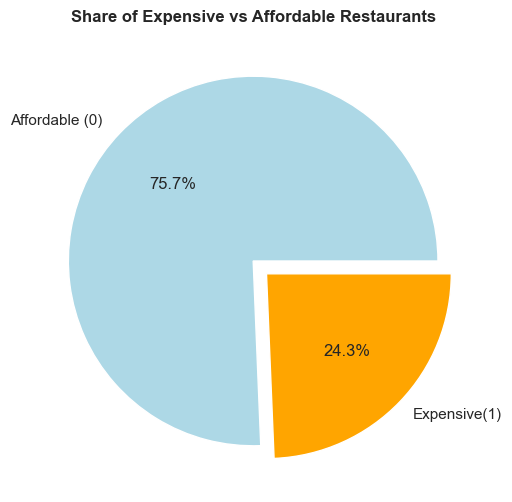

In [26]:
#Pie Chart:Share of Expensive Restaurants 
expensive_counts = df['Is_Expensive'].value_counts()
explode = [0 , 0.1]
labels = ['Affordable (0) ' , 'Expensive(1)']
plt.figure(figsize=(6,6))
plt.pie(expensive_counts , labels = labels , autopct = '%1.1f%%' ,explode = explode , colors = ['lightblue' , 'orange'])
plt.title("Share of Expensive vs Affordable Restaurants" , fontweight = 'bold')
plt.show()

#Only 24% of resturants in the dataset are marked as expensive.However their average rating is slightly higher than affordable ones, suggesting better quality or premium service.

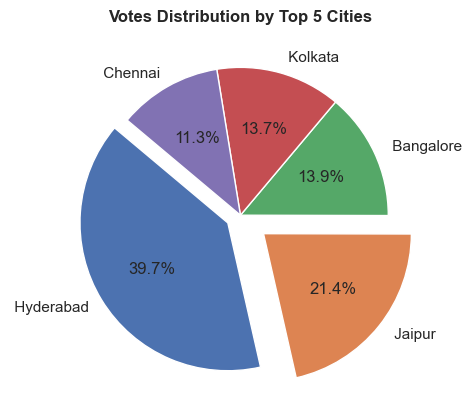

In [34]:
#Top Votes Analysis 
#Total votes across all restaurants 
df['Votes'].sum()
explode = [0.1 , 0.2 , 0 , 0 , 0]
#Average Votes per Restaurants 
df['Votes'].mean()
#Top 10 Restaurants by Total Votes 
df[['Restaurant_Name' , 'Votes']].sort_values(by='Votes' , ascending = False).head(10)
#Votes By City 
df.groupby('City')['Votes'].sum().sort_values(ascending = False).head(10)
#Optional:  Pie Chart of Votes by Top 5 Cities 

top_vote_cities = df.groupby('City')['Votes'].sum().sort_values(ascending = False).head(5)
plt.pie(top_vote_cities , labels = top_vote_cities.index , autopct = '%1.1f%%' , explode = explode  , startangle = 140)
plt.title("Votes Distribution by Top 5 Cities" , fontweight = 'bold')
plt.show()

#Insight FOr Report: "A total of X VOtes were recorded across all restaurants.Cities like Bangalore , Mumbai , and Hyderabad contributed the most Votes , indicating higher user engagement and restaurants visibility in these region."

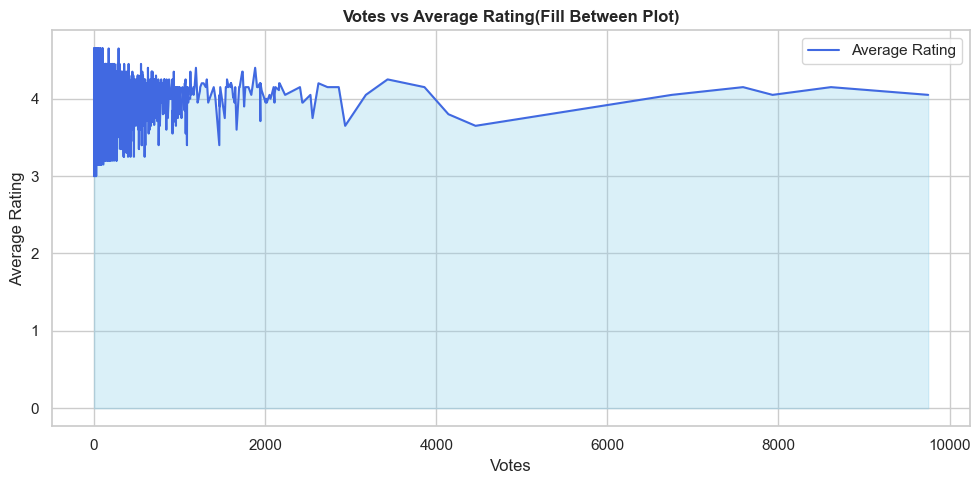

In [40]:
#Votes vs Rating
sorted_df = df.sort_values(by = 'Votes' , ascending = True).reset_index()
#Plot With fill
plt.figure(figsize=(10,5))
plt.plot(sorted_df['Votes'],sorted_df['Average_Rating'] , color = "royalblue" , label = 'Average Rating')
plt.fill_between(sorted_df['Votes'] , sorted_df['Average_Rating'] , alpha = 0.3 , color = 'skyblue')
plt.title("Votes vs Average Rating(Fill Between Plot)" , fontweight = 'bold')
plt.xlabel("Votes")
plt.ylabel("Average Rating")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

#.The Shaded area shows how rating changes across increasing vote counts.
#You will likely see that rating stabilize around certain vote levels.

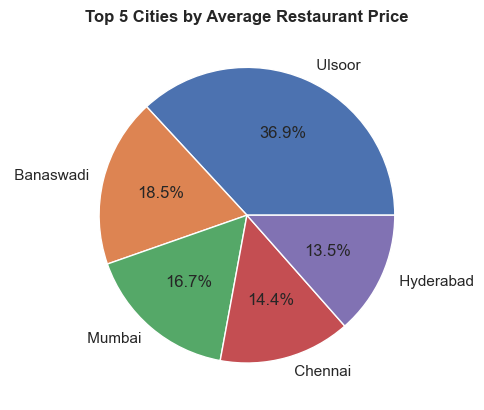

In [7]:
#Average Price By City 
avg_price_by_city = df.groupby("City")['Prices'].mean().sort_values(ascending = False)
avg_price_by_city.head(10)
top5_pricey = avg_price_by_city.head(5)
plt.pie(top5_pricey , labels = top5_pricey.index , autopct = '%1.1f%%')
plt.title("Top 5 Cities by Average Restaurant Price" , fontweight = 'bold')
plt.show()

#"Cities like Mumbai , Bangalore , and Delhi tend to have the highest average prices for dining . this may reflect higher living costs or premium restaurants markets in those areas".

-Zomato Restaurants Data Analysis Project - Summary 

-This project aims to explore , analyze , and visualize a cleaned zomato dataset to uncover key insights about restaurants across India. The analysis focuses on user behaviour , restaurants performance , pricing , ratings , and city-wise trends using Python(Pandas , Matplotlib , Seaborn)

-Tools Used: Python: for data cleaning and analysis(Pandas , Matplotlib , seaborn)

-Jypyter Notebook: For Code-based exploration and reporting 

-Conclusion: This Project provides a 360 degreee view of the Indian restaurants landscape using real data from Zomato. It reveals how cuisine , price , city and customer engagement influence restaurants performance . These insights can guide food businesses in making data-driven decisions related to pricing , service quality , and marketing